In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy import signal

In [2]:
class IEEGData:
    def __init__(self, path2data, path2info):
        self.info = loadmat(path2info)
        self.data = loadmat(path2data)['EEG']
        self.fs = int(self.info['fs'])
        self.t = np.arange(0, self.data.shape[1]/self.fs, 1/self.fs)
        # make seizure vector
        self.seizure = np.zeros(self.data.shape[1])
        for i in range(len(self.info['seizure_begin'])):
            self.seizure[int(self.info['seizure_begin'][i]):int(self.info['seizure_end'][i])] = 1

path2data = './data/ID02_1h.mat'            
path2info = './data/ID02_info.mat'  
ieeg = IEEGData(path2data, path2info)

/home/jan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/jan/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


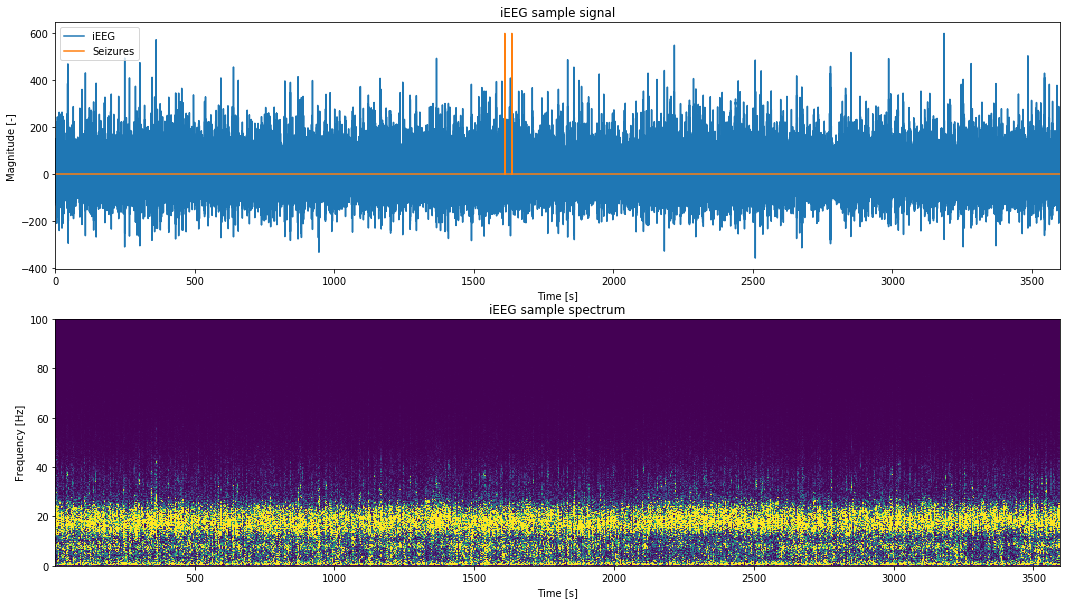

In [12]:
# spectrogram
channel = 10
f, t, Sxx = signal.spectrogram(ieeg.data[channel,:], fs=ieeg.fs, window=('tukey', 0.2), nperseg=5*ieeg.fs, noverlap=1*ieeg.fs, nfft=5*ieeg.fs)

plt.figure(figsize=(18,10))
plt.subplot(211)
plt.plot(ieeg.t, ieeg.data[channel,:], label='iEEG')
plt.ylabel('Magnitude [-]'), plt.xlabel('Time [s]')
plt.plot(ieeg.t, ieeg.seizure*np.max(ieeg.data[channel,:]), label='Seizures')
plt.title('iEEG sample signal')
plt.xlim([0, 3600])
plt.legend()

plt.subplot(212)
plt.title('iEEG sample spectrum')
plt.pcolormesh(t, f, Sxx, vmin=0, vmax=100)
plt.ylabel('Frequency [Hz]'), plt.xlabel('Time [s]')
plt.ylim([0, 100])
plt.savefig('./doc/figures/fig_ieeg_data.png')

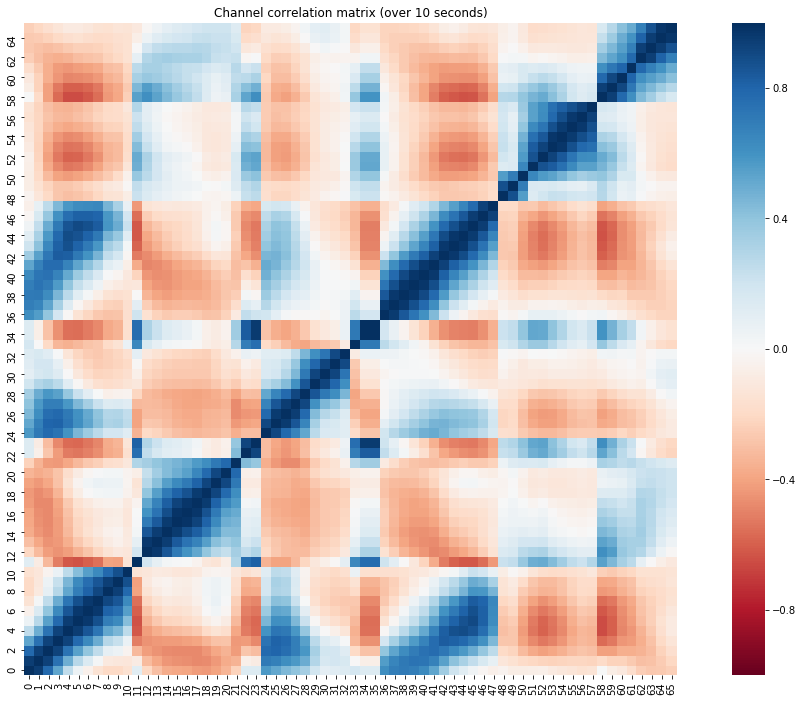

In [22]:
# correlation
time = 10
df = pd.DataFrame(ieeg.data[:,:time*ieeg.fs].transpose())
corr = df.corr()

fig, ax = plt.subplots(figsize=(20,12))
plt.title('Channel correlation matrix (over ' + str(time) + ' seconds)')
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, square=True)
ax.invert_yaxis()
plt.savefig('./doc/figures/fig_ieeg_correlation.png')

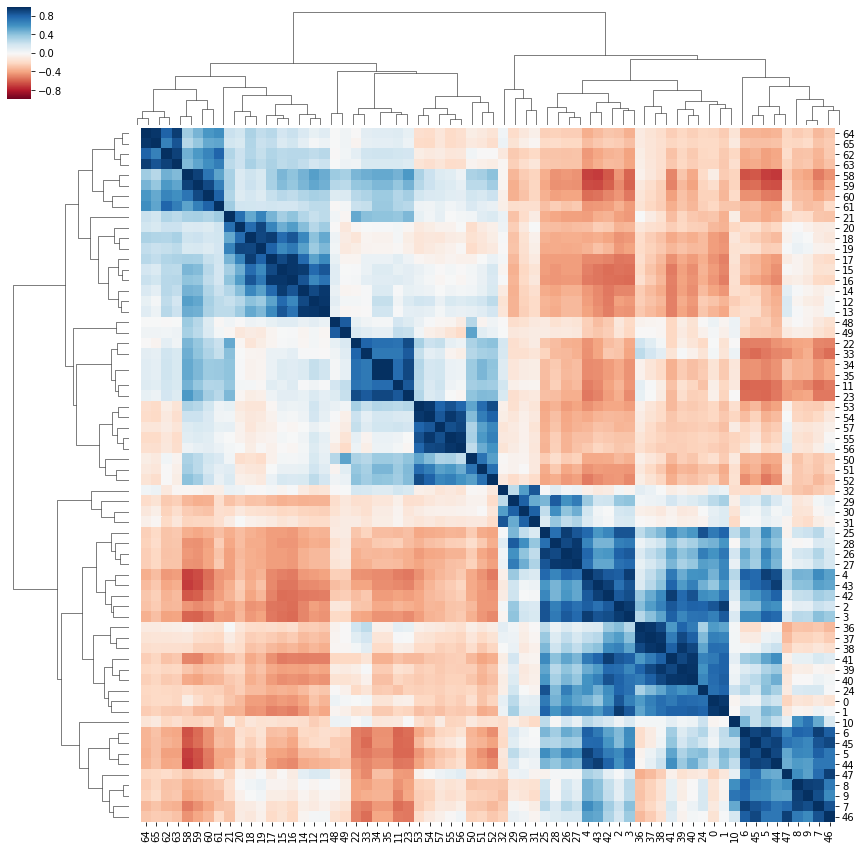

In [26]:
sns.clustermap(corr, cmap='RdBu', vmin=-1, vmax=1, square=True, figsize=(15,15))

In [16]:
ieeg.fs


512